In [ ]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot
import matplotlib.pyplot as plt
from pandas.core.frame import DataFrame
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader as web
from pandas_datareader import data, wb


import math
import seaborn as sns
import datetime as dt
from datetime import datetime

import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

In [ ]:
!pip install alpha_vantage

In [ ]:
import pandas as pd
from alpha_vantage.timeseries import TimeSeries
from google.colab import userdata

API_KEY =userdata.get('Alphavantage')

def get_stock_data(symbol, start_date="2012-05-01", end_date="2025-04-19"):
    ts = TimeSeries(key=API_KEY, output_format="pandas")
    data, meta_data = ts.get_daily(symbol=symbol, outputsize="full")



    data = data.rename(columns={
        "1. open": "Open",
        "2. high": "High",
        "3. low": "Low",
        "4. close": "Close",
        "5. volume": "Volume"
    })

    data.index = pd.to_datetime(data.index)
    data = data.loc[(data.index >= start_date) & (data.index <= end_date)]

    return data


TSLA = get_stock_data("TSLA")
NVDA = get_stock_data("NVDA")
NFLX = get_stock_data("NFLX")
AMD = get_stock_data("AMD")
AAPL=get_stock_data("AAPL")
GSPC = get_stock_data("SPY")


print(AAPL.shape, TSLA.shape, NVDA.shape, NFLX.shape, AMD.shape)
print(AAPL.columns)

(3261, 5) (3261, 5) (3261, 5) (3261, 5) (3261, 5)
Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')


In [ ]:
AAPL

,Open,High,Low,Close,Volume
date,,,,,
2025-04-17,197.200,198.8335,194.4200,196.98,52164675.0
2025-04-16,198.360,200.7000,192.3700,194.27,59732423.0
2025-04-15,201.855,203.5100,199.8000,202.14,51343872.0
2025-04-14,211.440,212.9400,201.1621,202.52,101352911.0
2025-04-11,186.100,199.5400,186.0600,198.15,87435915.0
...,...,...,...,...,...
2012-05-07,561.500,572.7700,561.2300,569.48,16432800.0
2012-05-04,577.080,578.3600,565.1700,565.25,18928300.0
2012-05-03,590.500,591.4000,580.3000,581.82,13948200.0


In [ ]:
GSPC.head()

,Open,High,Low,Close,Volume
date,,,,,
2025-04-17,527.640,531.1650,523.91,526.41,79868083.0
2025-04-16,531.680,537.8854,520.29,525.66,83484814.0
2025-04-15,539.675,543.2300,536.81,537.61,56892874.0
2025-04-14,544.050,544.2800,533.86,539.12,68033993.0
2025-04-11,523.010,536.4300,520.07,533.94,97866334.0


In [ ]:
AAPL.tail()

,Open,High,Low,Close,Volume
date,,,,,
2012-05-07,561.50,572.7700,561.23,569.48,16432800.0
2012-05-04,577.08,578.3600,565.17,565.25,18928300.0
2012-05-03,590.50,591.4000,580.30,581.82,13948200.0
2012-05-02,580.24,587.3999,578.86,585.98,15263900.0
2012-05-01,584.90,596.7600,581.23,582.13,21821400.0


dataset consisiting of data till the last friday

now, we will check for any missing data in the dataset we downloaded

In [ ]:
AAPL.isnull().sum()

,0
Open,0
High,0
Low,0
Close,0
Volume,0


In [ ]:
TSLA.isnull().sum()

,0
Open,0
High,0
Low,0
Close,0
Volume,0


In [ ]:
NVDA.isnull().sum()

,0
Open,0
High,0
Low,0
Close,0
Volume,0


In [ ]:
print(NFLX.isnull().sum(),AMD.isnull().sum(), GSPC.isnull().sum(), sep='\n\n')

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64


The presence of no missing values in each stock dataset is a positive finding, indicating that we have complete and reliable data for analysis. This allows for accurate assessments of various aspects of the stocks, simplifies data preparation, and ensures more robust and trustworthy studies.

In [ ]:
GSPC.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [ ]:
AAPL.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [ ]:
dataset = pd.concat([
    AAPL['Close'], NFLX['Close'],
    AMD['Close'], NVDA['Close'],
    TSLA['Close'], GSPC['Close']
], axis=1)



dataset.columns = ['AAPL', 'NFLX', 'AMD', 'NVDA', 'TSLA', 'GSPC']


print(dataset.head())


              AAPL    NFLX    AMD    NVDA    TSLA    GSPC
date                                                     
2025-04-17  196.98  973.03  87.50  101.49  241.37  526.41
2025-04-16  194.27  961.63  88.29  104.49  241.55  525.66
2025-04-15  202.14  976.28  95.29  112.20  254.11  537.61
2025-04-14  202.52  931.28  94.50  110.71  252.35  539.12
2025-04-11  198.15  918.29  93.40  110.93  252.31  533.94


In [ ]:
print(AAPL.columns)

Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')


In [ ]:
print('Shape of data',dataset.shape)


Shape of data (3261, 6)


In [ ]:
num_bins = 10

for column_name in dataset.columns:
    values = dataset[column_name]

    min_value = values.min()
    max_value = values.max()
    range_value = max_value - min_value
    bin_size = range_value / num_bins

    bins = [min_value + i * bin_size for i in range(num_bins + 1)]

    hist, bin_edges = np.histogram(values, bins=bins)

    print(f"\nBinning for {column_name}:")
    for i in range(len(hist)):
        print(f"Interval: {bin_edges[i]:.2f} - {bin_edges[i+1]:.2f}, Count: {hist[i]}")



Binning for AAPL:
Interval: 90.28 - 151.46, Count: 1224
Interval: 151.46 - 212.64, Count: 1013
Interval: 212.64 - 273.83, Count: 342
Interval: 273.83 - 335.01, Count: 96
Interval: 335.01 - 396.19, Count: 40
Interval: 396.19 - 457.37, Count: 125
Interval: 457.37 - 518.55, Count: 105
Interval: 518.55 - 579.74, Count: 187
Interval: 579.74 - 640.92, Count: 89
Interval: 640.92 - 702.10, Count: 40

Binning for NFLX:
Interval: 53.80 - 154.28, Count: 653
Interval: 154.28 - 254.76, Count: 432
Interval: 254.76 - 355.24, Count: 672
Interval: 355.24 - 455.72, Count: 639
Interval: 455.72 - 556.20, Count: 400
Interval: 556.20 - 656.68, Count: 238
Interval: 656.68 - 757.16, Count: 111
Interval: 757.16 - 857.64, Count: 20
Interval: 857.64 - 958.12, Count: 58
Interval: 958.12 - 1058.60, Count: 38

Binning for AMD:
Interval: 1.62 - 22.60, Count: 1656
Interval: 22.60 - 43.57, Count: 276
Interval: 43.57 - 64.55, Count: 172
Interval: 64.55 - 85.52, Count: 282
Interval: 85.52 - 106.50, Count: 329
Interval:

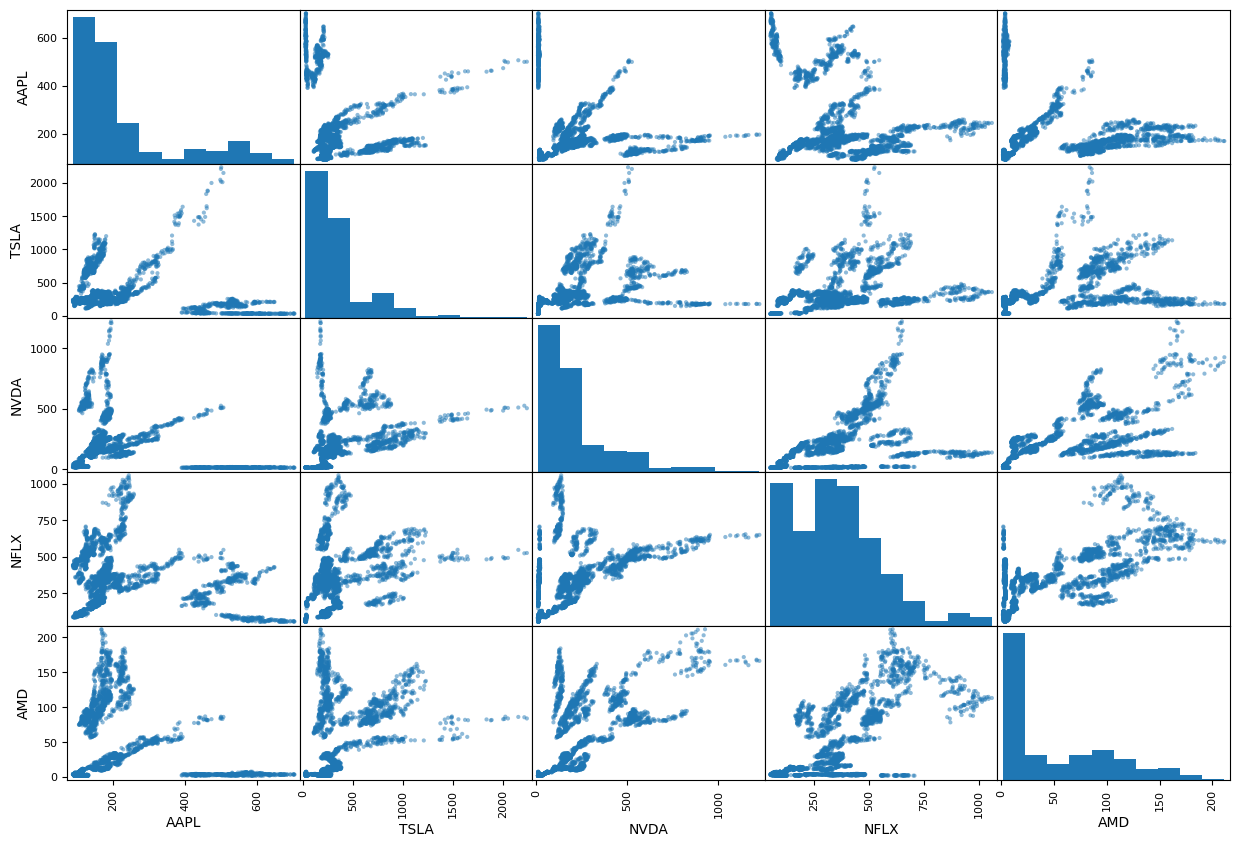

In [ ]:
pd.plotting.scatter_matrix(dataset[['AAPL','TSLA','NVDA','NFLX','AMD']], figsize=(15,10))
plt.show()

          AAPL      NFLX       AMD      NVDA      TSLA      GSPC
AAPL  1.000000 -0.157562 -0.232230 -0.271119 -0.194259 -0.354452
NFLX -0.157562  1.000000  0.677232  0.419911  0.314650  0.739940
AMD  -0.232230  0.677232  1.000000  0.675901  0.387304  0.944098
NVDA -0.271119  0.419911  0.675901  1.000000  0.385526  0.606131
TSLA -0.194259  0.314650  0.387304  0.385526  1.000000  0.382311
GSPC -0.354452  0.739940  0.944098  0.606131  0.382311  1.000000


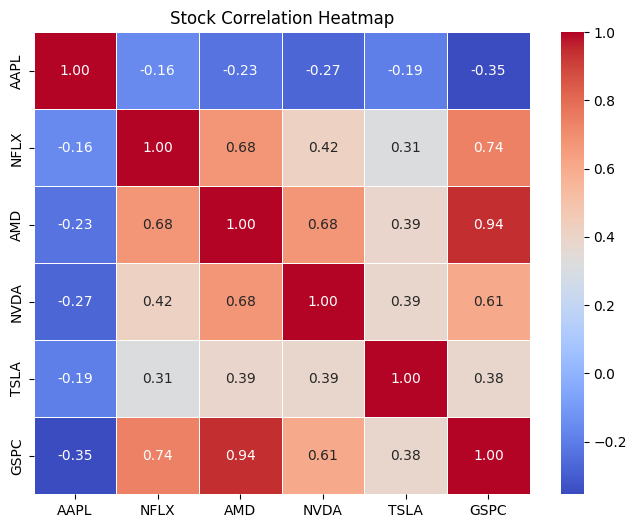

In [ ]:
correlation_matrix = dataset.corr()

print(correlation_matrix)

plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Stock Correlation Heatmap")
plt.show()

In [ ]:
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
np.random.seed(RANDOM_SEED)

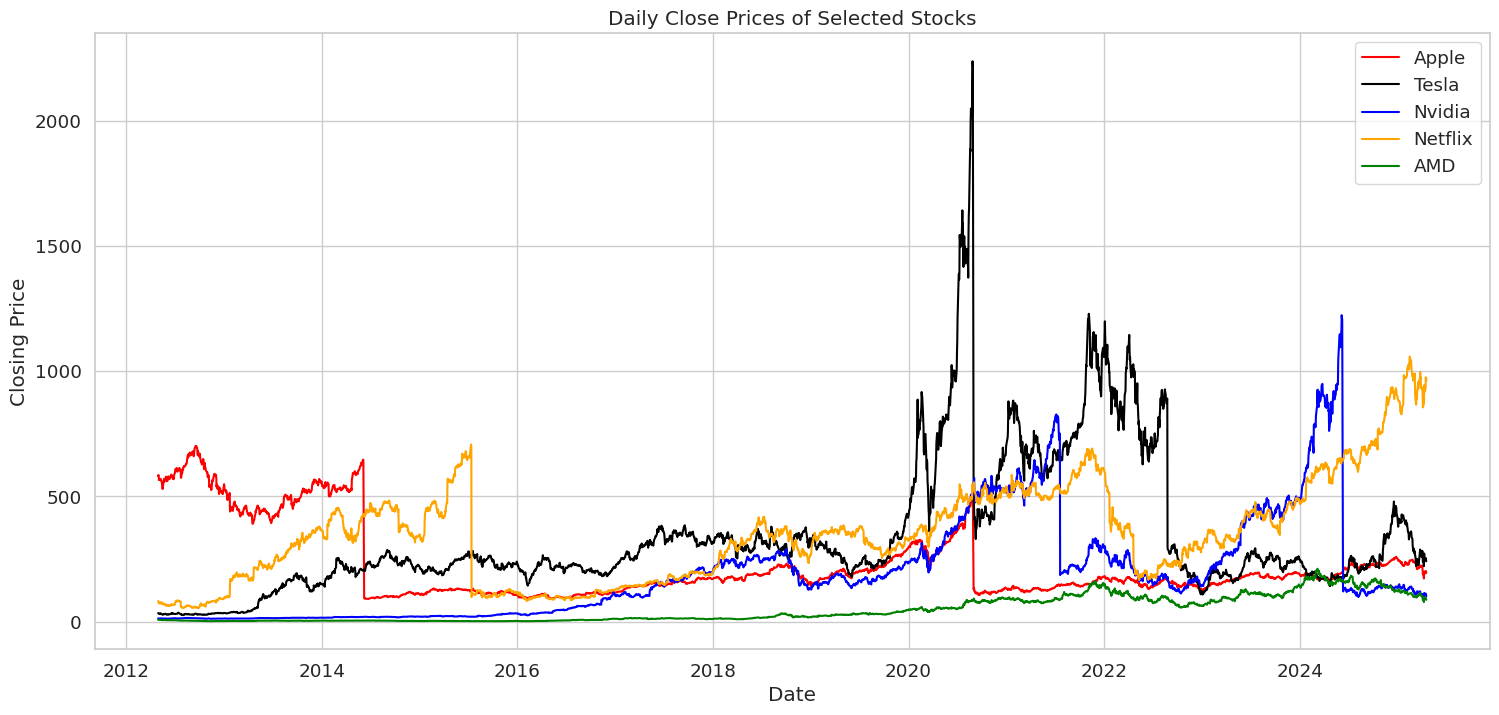

In [ ]:
plt.figure(figsize=(18, 8))
plt.grid(True)
plt.title('Daily Close Prices of Selected Stocks')
plt.xlabel('Date')
plt.ylabel('Closing Price')


colors = ["red", "black", "blue", "orange", "green"]

plt.plot(dataset['AAPL'], color=colors[0], label='Apple', lw=1.5)
plt.plot(dataset['TSLA'], color=colors[1], label='Tesla', lw=1.5)
plt.plot(dataset['NVDA'], color=colors[2], label='Nvidia', lw=1.5)
plt.plot(dataset['NFLX'], color=colors[3], label='Netflix', lw=1.5)
plt.plot(dataset['AMD'], color=colors[4], label='AMD', lw=1.5)

plt.legend()
plt.show()


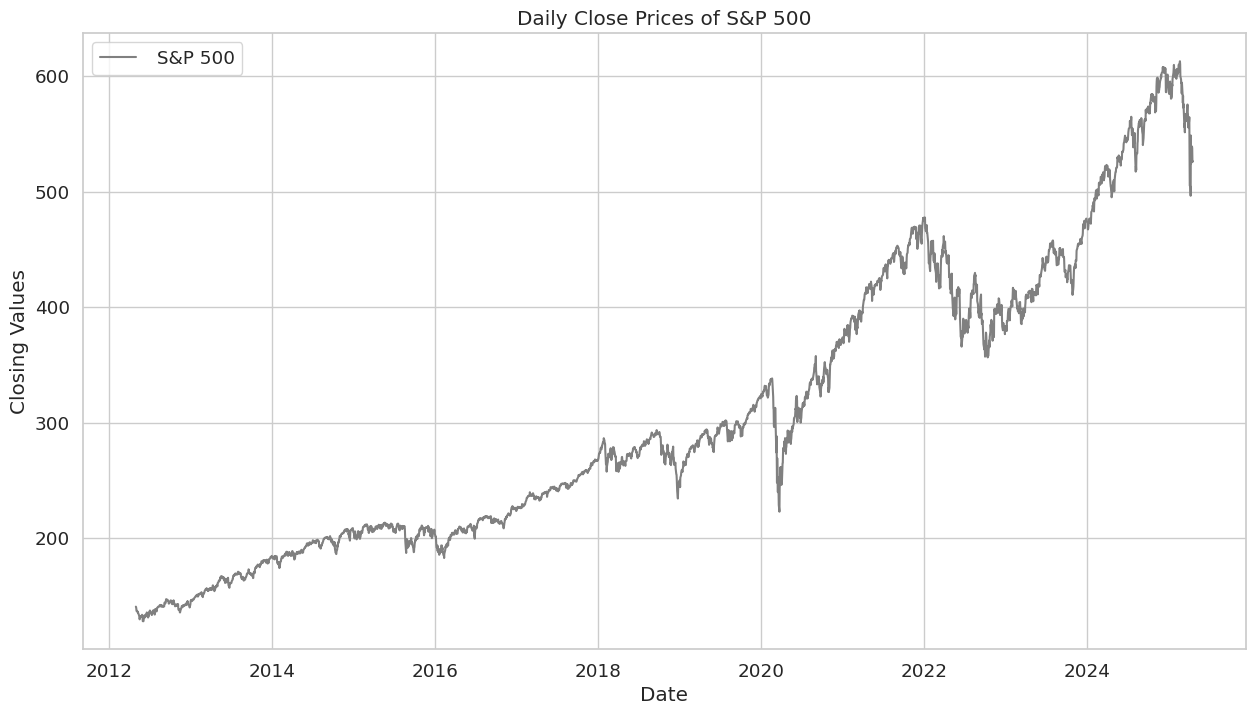

In [ ]:
plt.figure(figsize=(15,8))
plt.grid(True)
plt.title('Daily Close Prices of S&P 500')
plt.xlabel('Date')
plt.ylabel('Closing Values')
plt.plot(dataset['GSPC'], 'grey', label=' S&P 500')
plt.legend()
plt.show()

*Standard risk measure: Volatility (Returns)*:

Volatility is a standard risk measure that assesses the price fluctuations and stability of financial assets. The stock prices of {Apple, Netflix, AMD, Nvidia, and Tesla} are known for their dynamic and often volatile nature, driven by rapid technological advancements and market disruptions. This higher volatility reflects the risks associated with investing in these companies. On the other hand, the S&P 500, a broad market index representing 500 large-cap US companies, generally experiences lower volatility due to its diversified nature. However, during periods of market turbulence, the S&P 500 can also exhibit increased volatility. Understanding and considering volatility is crucial for investors to evaluate risk and make informed investment decisions.

Create a new columns in Dataset - Returns:

The formula for Simple Return is a basic calculation that measures the percentage change in the value of an investment over a given period.

Simple Return:

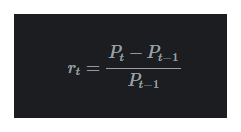



In [ ]:

dataset = dataset.sort_index(ascending=True)
dataset['R_AAPL'] = dataset[['AAPL']].pct_change(1)
dataset['R_NFLX'] = dataset[['NFLX']].pct_change(1)
dataset['R_AMD'] = dataset[['AMD']].pct_change(1)
dataset['R_NVDA'] = dataset[['NVDA']].pct_change(1)
dataset['R_TSLA'] = dataset[['TSLA']].pct_change(1)
dataset['R_GSPC'] = dataset[['GSPC']].pct_change(1)
dataset.head()


,AAPL,NFLX,AMD,NVDA,TSLA,GSPC,R_AAPL,R_NFLX,R_AMD,R_NVDA,R_TSLA,R_GSPC
date,,,,,,,,,,,,
2012-05-01,582.13,81.360,7.59,13.23,33.78,140.74,NaN,NaN,NaN,NaN,NaN,NaN
2012-05-02,585.98,82.230,7.63,12.85,33.94,140.32,0.006614,0.010693,0.005270,-0.028723,0.004737,-0.002984
2012-05-03,581.82,75.970,7.41,12.63,32.46,139.25,-0.007099,-0.076128,-0.028834,-0.017121,-0.043606,-0.007625
2012-05-04,565.25,73.145,7.18,12.26,31.83,137.00,-0.028480,-0.037186,-0.031039,-0.029295,-0.019409,-0.016158
2012-05-07,569.48,73.450,7.18,12.47,32.47,137.10,0.007483,0.004170,0.000000,0.017129,0.020107,0.000730


In [ ]:
dataset.describe()

,AAPL,NFLX,AMD,NVDA,TSLA,GSPC,R_AAPL,R_NFLX,R_AMD,R_NVDA,R_TSLA,R_GSPC
count,3261.000000,3261.000000,3261.000000,3261.000000,3261.000000,3261.000000,3260.000000,3260.000000,3260.000000,3260.000000,3260.000000,3260.000000
mean,227.083742,352.340564,48.328215,195.198993,342.437206,306.242883,0.000347,0.001538,0.001390,0.001664,0.001614,0.000463
std,146.774940,200.320909,51.841598,201.626514,278.026830,123.637011,0.026788,0.033216,0.036075,0.035434,0.040583,0.010744
min,90.280000,53.800000,1.620000,11.380000,26.100000,128.100000,-0.854857,-0.860333,-0.242291,-0.899254,-0.774862,-0.109424
25%,130.280000,185.590000,4.010000,22.550000,199.730000,205.620000,-0.007572,-0.011685,-0.016742,-0.011652,-0.016430,-0.003722
50%,172.100000,341.760000,20.380000,150.790000,249.850000,275.650000,0.000761,0.000610,0.000000,0.001970,0.001258,0.000597
75%,232.800000,474.470000,89.050000,250.620000,351.420000,409.190000,0.010148,0.014563,0.018758,0.016052,0.019363,0.005622
max,702.100000,1058.600000,211.380000,1224.400000,2238.750000,612.930000,0.153288,0.422235,0.522901,0.298067,0.244029,0.105019


In [ ]:
dataset[['R_AAPL','R_NFLX','R_AMD','R_NVDA','R_TSLA', 'R_GSPC']].std()

,0
R_AAPL,0.026788
R_NFLX,0.033216
R_AMD,0.036075
R_NVDA,0.035434
R_TSLA,0.040583
R_GSPC,0.010744


The descriptive statistics table provides valuable insights into the risk levels of each stock, as represented by their standard deviations. Among the stocks analyzed, Tesla (TSLA) exhibits the highest level of risk with a standard deviation of 0.040364, indicating relatively significant price fluctuations and potential volatility. Following AAPL, Netflix (NFLX) shows a lower but still substantial level of risk.

Comparatively, the risk associated with the S&P 500 market is relatively lower, as indicated by its standard deviation of 0.010472. This suggests that, on average, individual stocks such as Tesla and AMD carry higher risks than the overall market represented by the S&P 500. These findings highlight the importance of considering risk factors when making investment decisions. Investors may choose to allocate their portfolios based on their risk appetite, taking into account the higher volatility of specific stocks like Tesla and NVIDIA compared to the broader market.

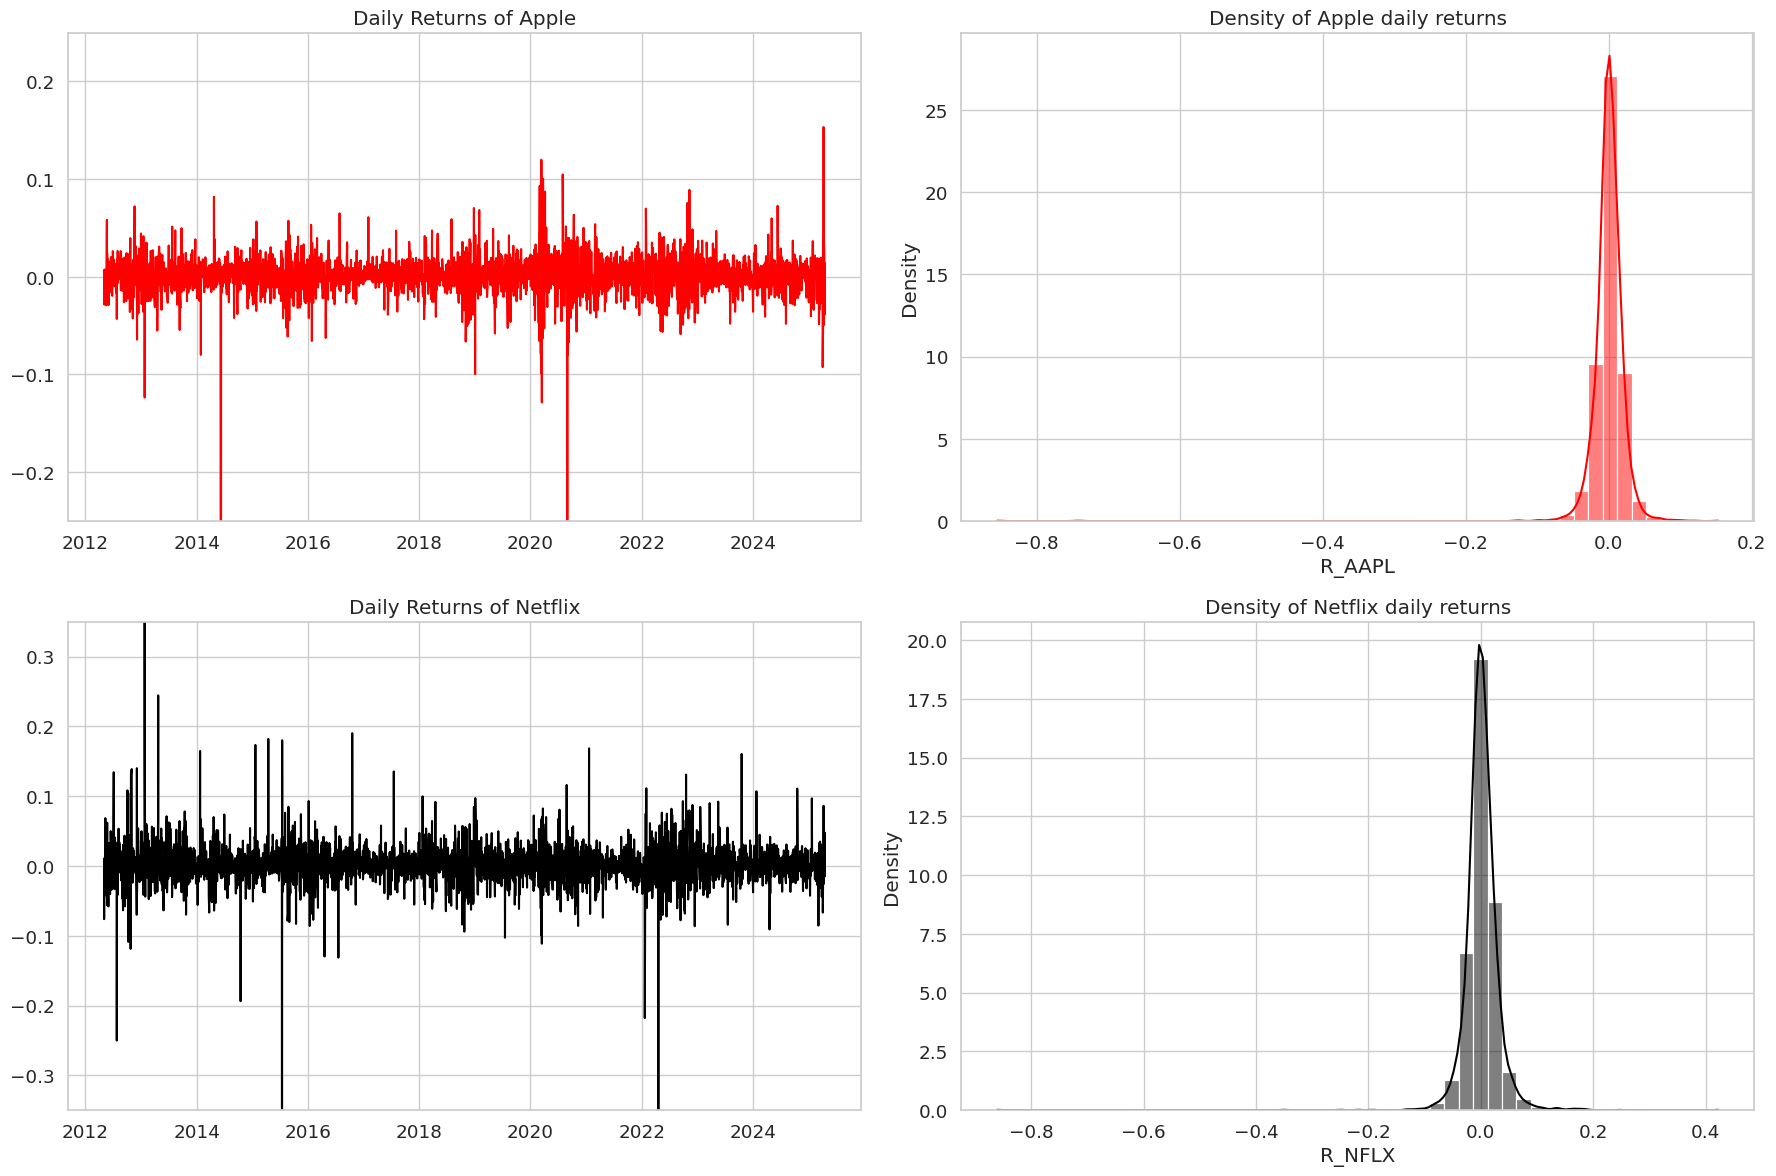

In [ ]:
with sns.axes_style("whitegrid"):
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18,12))

    axes[0][0].plot(dataset['R_AAPL'], color='red')
    axes[0][0].set_title('Daily Returns of Apple')
    axes[0][0].set_ylim(-0.25, 0.25)

    sns.histplot(dataset['R_AAPL'], kde=True, stat="density", bins=50, color='red', ax=axes[0][1])
    axes[0][1].set_title('Density of Apple daily returns')

    axes[1][0].plot(dataset['R_NFLX'], color='black')
    axes[1][0].set_title('Daily Returns of Netflix')
    axes[1][0].set_ylim(-0.35, 0.35)

    sns.histplot(dataset['R_NFLX'], kde=True, stat="density", bins=50, color='black', ax=axes[1][1])
    axes[1][1].set_title('Density of Netflix daily returns')

    plt.tight_layout()
    plt.show()


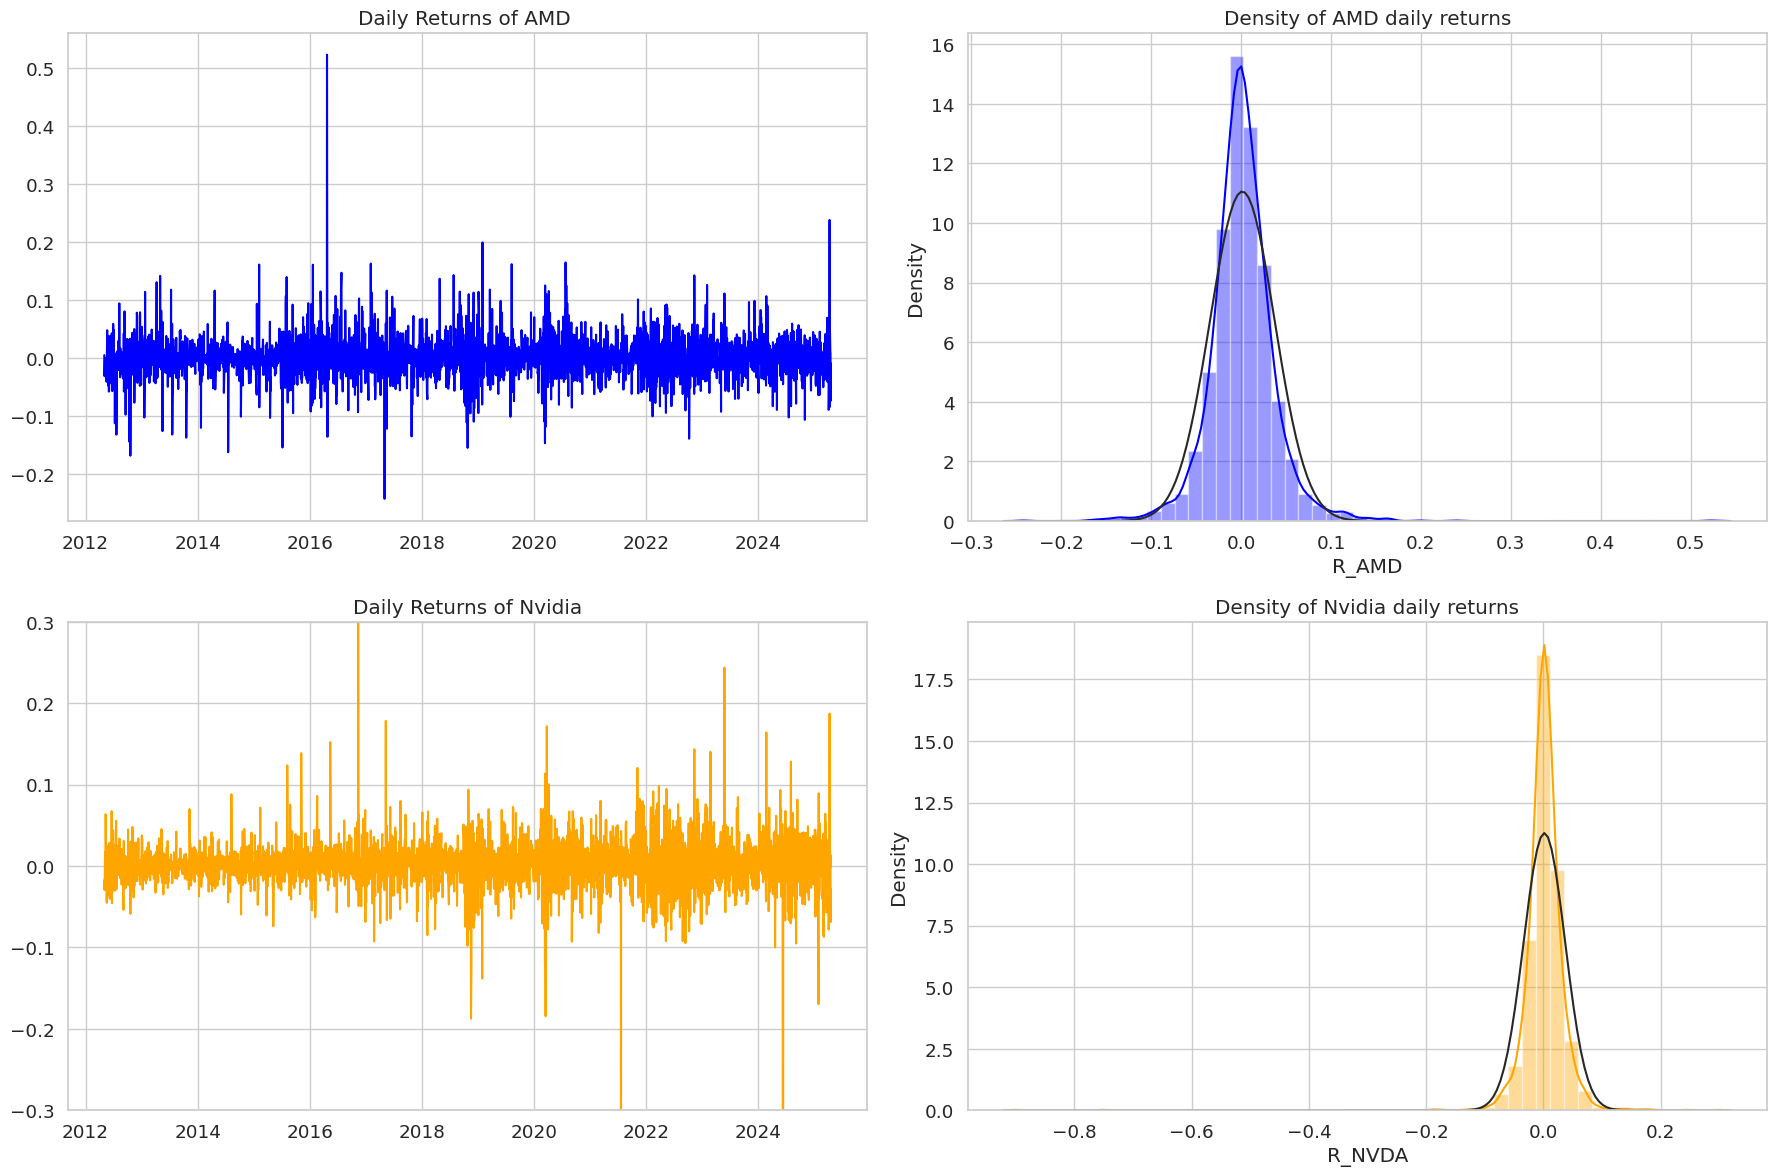

In [ ]:
from scipy import stats
with sns.axes_style("whitegrid"):
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18,12))

    axes[0][0].plot(dataset['R_AMD'], color='blue')
    axes[0][0].set_title('Daily Returns of AMD ')


    sns.distplot(dataset['R_AMD'], norm_hist=True, fit=stats.norm, color='blue',
                bins=50, ax=axes[0][1])
    axes[0][1].set_title('Density of AMD daily returns')

    axes[1][0].plot(dataset['R_NVDA'], color='orange')
    axes[1][0].set_title('Daily Returns of Nvidia')
    axes[1][0].set_ylim(-0.3, 0.3)


    sns.distplot(dataset['R_NVDA'], norm_hist=True, fit=stats.norm, color='orange',
                bins=50, ax=axes[1][1])
    axes[1][1].set_title('Density of Nvidia daily returns')
    plt.tight_layout()
    fig.show();

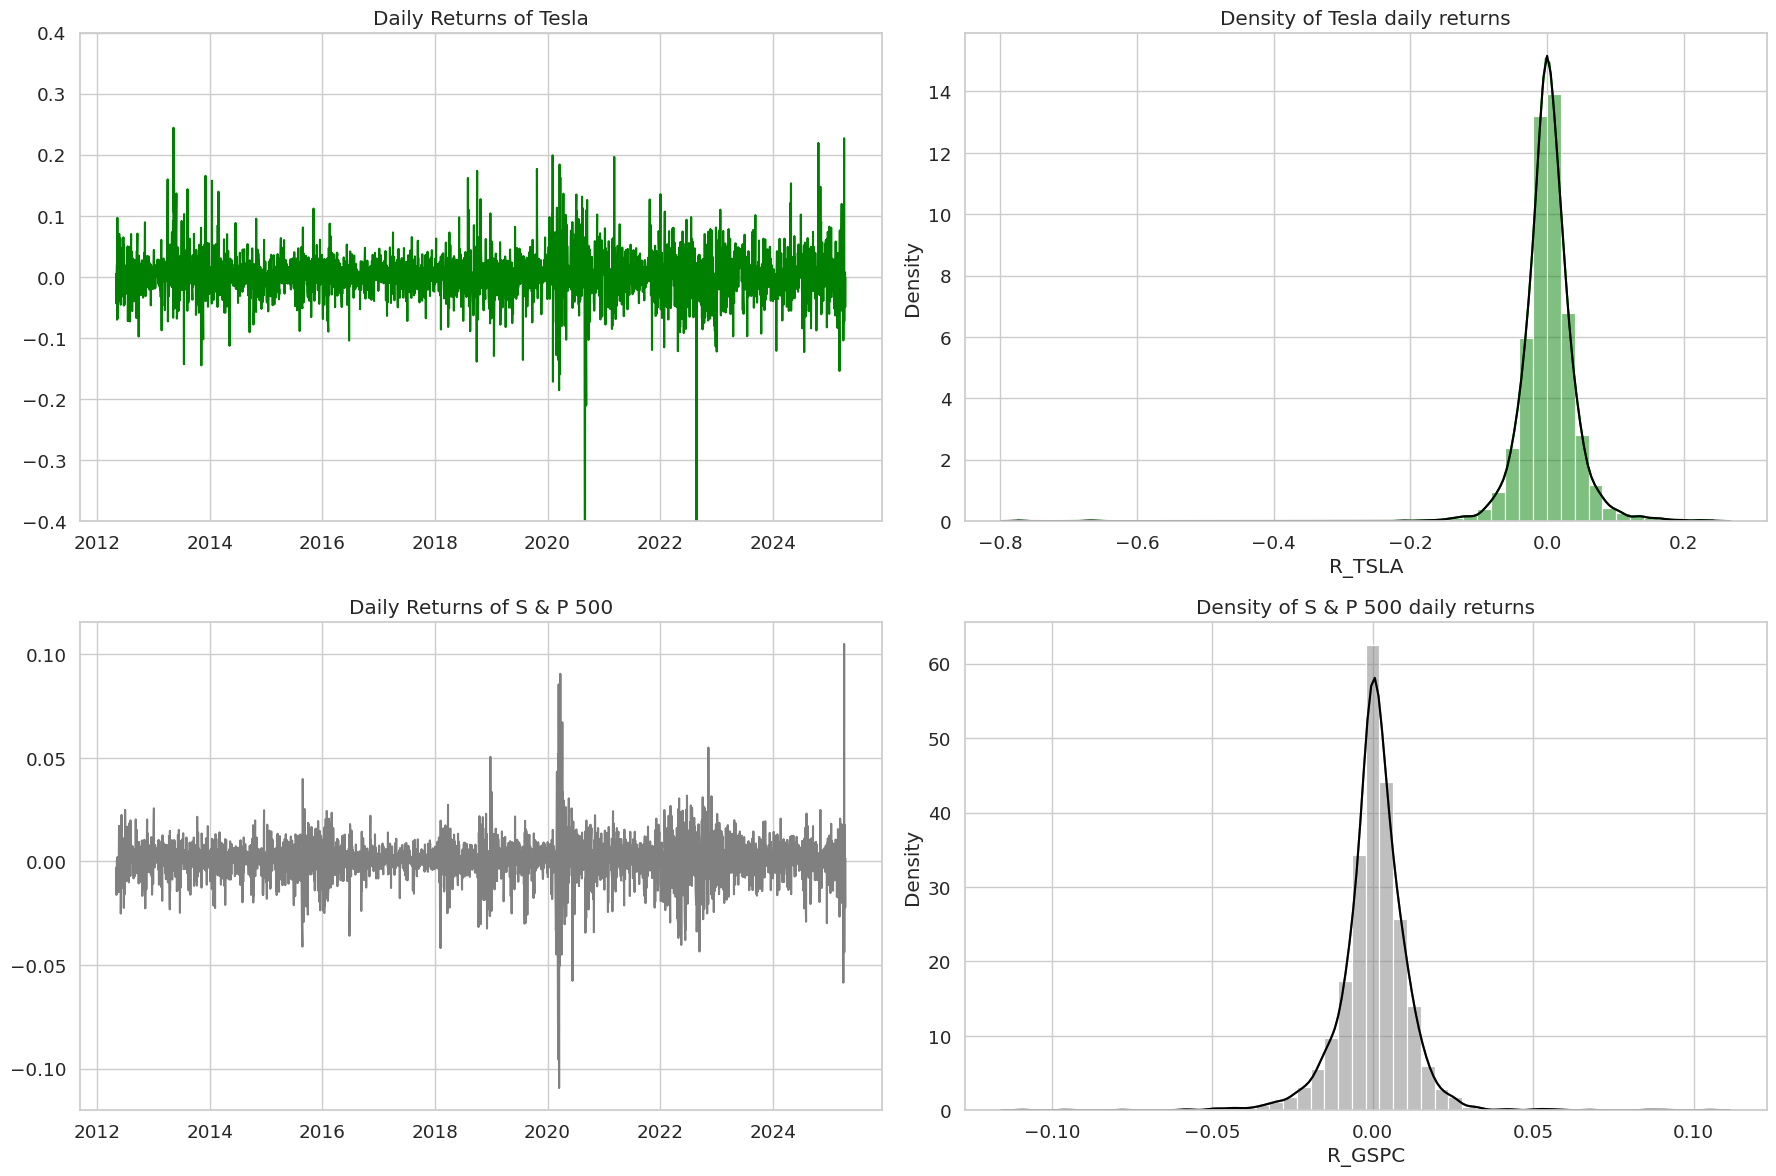

In [ ]:
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

with sns.axes_style("whitegrid"):
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18,12))

    axes[0][0].plot(dataset['R_TSLA'], color='green')
    axes[0][0].set_title('Daily Returns of Tesla')
    axes[0][0].set_ylim(-0.4, 0.4)

    sns.histplot(dataset['R_TSLA'], kde=True, stat="density", bins=50, color='green', ax=axes[0][1])
    sns.kdeplot(dataset['R_TSLA'], color='black', ax=axes[0][1])
    axes[0][1].set_title('Density of Tesla daily returns')

    axes[1][0].plot(dataset['R_GSPC'], color='grey')
    axes[1][0].set_title('Daily Returns of S & P 500')

    sns.histplot(dataset['R_GSPC'], kde=True, stat="density", bins=50, color='grey', ax=axes[1][1])
    sns.kdeplot(dataset['R_GSPC'], color='black', ax=axes[1][1])
    axes[1][1].set_title('Density of S & P 500 daily returns')


    plt.tight_layout()
    plt.show()


The return graphs indicate periods of high volatility in Tesla, Apple, NVIDIA, and the S&P 500, particularly at the beginning of 2020 due to the COVID-19 crisis. During this time, the stock returns experienced significant fluctuations and increased volatility, reflecting the pandemic's market uncertainty and economic impact.

Apart from these volatile periods, the density of returns for each company appears to be symmetric around the origin, suggesting a balanced distribution of positive and negative returns. Additionally, the returns of each company exhibit a pattern that closely follows a normal distribution. This implies on average, the returns of these stocks tend to cluster near the mean value, with fewer extreme outliers.

Understanding the volatility and distribution of returns is crucial for investors as it provides insights into the potential risks and rewards associated with investing in these companies. It enables investors to evaluate historical performance and make informed decisions based on risk appetite and return expectations.

# Portfolio Optimization using Efficient Frontier

Portfolio Optimization using the Efficient Frontier is a powerful approach to construct an optimal investment portfolio by considering the stock prices of  Apple, AMD, Netflix,Tesla,NVDA and the S&P 500. The Efficient Frontier is a graphical representation that illustrates the trade-off between risk and return for different portfolio allocations. By analyzing the historical data and expected returns of these stocks, along with their correlations, portfolio optimization techniques can help investors identify the optimal combination of assets that maximize returns for a given level of risk or minimize risk for a desired level of return. This approach allows investors to make well-informed decisions, diversify their investments, and potentially achieve higher returns while managing risk effectively in the context of these prominent tech companies and the broader market represented by the S&P 500.

Correlation coefficients between companies' close prices¶

The correlation coefficients between the close prices of Apple, AMD, Netflix, Tesla,Nvidia and the S&P 500 provide insights into the degree of linear relationship between the individual stock prices and the overall market. These coefficients quantify the strength and direction of the relationship, helping investors understand the level of synchronisation or divergence between these companies' stocks and the broader market.

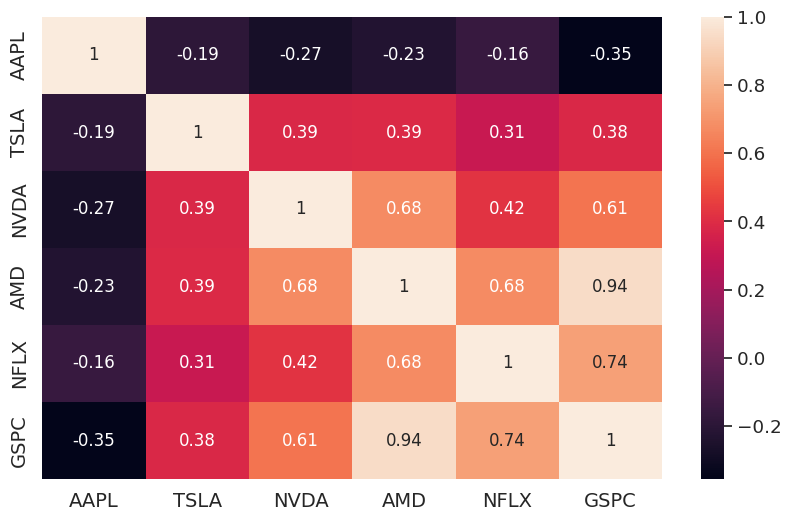

In [ ]:
corr = dataset[['AAPL','TSLA','NVDA','AMD', 'NFLX','GSPC']].corr()
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values,annot=True,annot_kws={'size':12})
heat_map=plt.gcf()
heat_map.set_size_inches(10,6)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt. show()

The correlation map of daily prices reveals strong positive correlations between the S&P 500 and AMD and between AMD and NVDIA. These correlations indicate a tendency for the stock prices of these companies to move in a similar direction, highlighting potential interdependencies and providing insights for portfolio diversification strategies.

Correlation coefficients between companies' returns

The correlation coefficients between the returns of  Apple,NVIDIA,AMD, Netflix, Tesla, and the S&P 500 provide a measure of the interdependence or independence of these companies' returns concerning the broader market, aiding investors in assessing the diversification potential and risk associated with including these stocks in their portfolios.

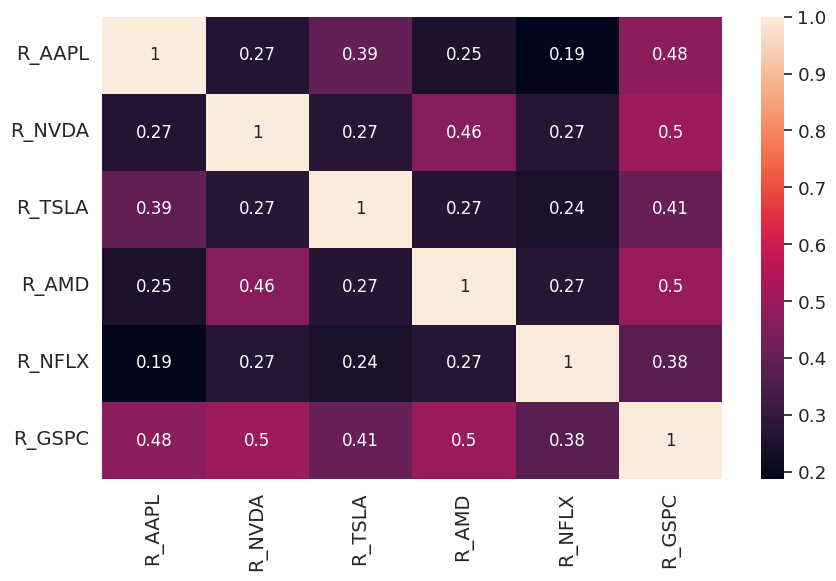

In [ ]:
corr = dataset[['R_AAPL','R_NVDA','R_TSLA','R_AMD', 'R_NFLX','R_GSPC']].corr()
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values,annot=True,annot_kws={'size':12})
heat_map=plt.gcf()
heat_map.set_size_inches(10,6)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt. show()

The correlation map of returns prices demonstrates a strong positive correlation between the returns of the S&P 500 and the returns of NVDA. This indicates a tendency for the two to move in a similar direction, suggesting that overall market performance changes influence NVDA's stock returns.

Annualized Volatility
=
Daily Volatility
i
×
√
252
=
Returns
i
×
√
252
,

i
=
{
TSLA
,
AAPL
,
NVDA
,
AMD
,
NFLX
,
GSPC
}

Monthly volatility
=
Daily Volatility
i
×
√
21
=
Returns
i
×
√
21
,

i
=
{
TSLA
,
AAPL
,
NVDA
,
AMD
,
NFLX
,
GSPC
}

Note: There are 252 trading days per year and 21 trading days per month.

In [ ]:
returns  = dataset[['R_TSLA','R_AAPL','R_NVDA','R_NFLX','R_AMD', 'R_GSPC']]
n_days = 252
for col in returns.columns:
    print("The volatility of the stock of", col, "=",round(returns[col].std()*np.sqrt(n_days)*100,2), '% per year')

The volatility of the stock of R_TSLA = 64.42 % per year
The volatility of the stock of R_AAPL = 42.52 % per year
The volatility of the stock of R_NVDA = 56.25 % per year
The volatility of the stock of R_NFLX = 52.73 % per year
The volatility of the stock of R_AMD = 57.27 % per year
The volatility of the stock of R_GSPC = 17.06 % per year


In [ ]:
returns  = dataset[['R_TSLA','R_AAPL','R_NVDA','R_NFLX','R_AMD', 'R_GSPC']]
n_days = 21
for col in returns.columns:
    print("The volatility of the stock of", col, "=",round(returns[col].std()*np.sqrt(n_days)*100,2), '% per month')

The volatility of the stock of R_TSLA = 18.6 % per month
The volatility of the stock of R_AAPL = 12.28 % per month
The volatility of the stock of R_NVDA = 16.24 % per month
The volatility of the stock of R_NFLX = 15.22 % per month
The volatility of the stock of R_AMD = 16.53 % per month
The volatility of the stock of R_GSPC = 4.92 % per month


We can see that Tesla's monthly volatility (
18.48
%
 ) is still higher than other stocks.

Tesla exhibits higher annual volatility (
64.08
%
 ) than the other stocks, indicating more significant price fluctuations and potential risk. Even every month, Tesla's volatility (
18.5
%
 ) remains higher than the other stocks, suggesting higher price swings.

## Sharpe ratio

The Sharpe ratio measures the risk-adjusted return for companies like  Apple, AMD, Netflix, Tesla, NVDA and the S&P 500. By comparing their respective Sharpe ratios, we can assess the efficiency of each investment in generating returns relative to the level of risk. A higher Sharpe ratio indicates better risk-adjusted performance, implying that the acquisition provides higher returns for the risk taken. Analysing the Sharpe ratios of these companies and comparing them to the S&P 500 helps investors evaluate each investment option's relative attractiveness in balancing risk and return.

It is calculated by the formula below:

Sharpe ratio
=
(R
p
−
R
f)
/
σ
p


R
p
  = Return of portfolio.

R
f
  = Risk-Free rate.

σ
p
  = Standard deviation of portfolio's excess return

In [ ]:
n_days = 252
def sharpe_ratio (serie, rf = 0.025):
    rp = serie.mean()*n_days
    volatility = serie.std()*np.sqrt(n_days)
    sharpe = (rp -rf  ) / volatility
    return sharpe

In [ ]:
for col in returns.columns:
    print("The Sharpe ratio of,", col,"=", round(sharpe_ratio(returns[col]),2 ))

The Sharpe ratio of, R_TSLA = 0.59
The Sharpe ratio of, R_AAPL = 0.15
The Sharpe ratio of, R_NVDA = 0.7
The Sharpe ratio of, R_NFLX = 0.69
The Sharpe ratio of, R_AMD = 0.57
The Sharpe ratio of, R_GSPC = 0.54


##Interpretation of the Sharpe Ratio

The Sharpe ratio gives the excess return of a stock (or a portfolio) per unit of risk.

The Sharpe ratio of the S\&P500 is equal to 0.58. Given a unit of risk, the S\&P500 has an excess annual return of
58
%
 compared to a risk-free investment with an annual return of
2.5
%
.

For the same unit of risk, Nvidia has an annual excess return of
73
%
 compared to a risk-free investment with an annual return of
2.5
%
.


Under these conditions, the best stock is Nvidia because it has the highest Sharpe ratio.

The Sharpe ratio is a valuable metric for assessing the risk-adjusted performance of stocks or portfolios. In the case of the S&P 500, its Sharpe ratio is calculated to be 0.59. This implies that for a given unit of risk, the S&P 500 generates an excess annual return of
59
%
 compared to a risk-free investment with an annual return of
2.5
%
.

When considering Nvidia, its Sharpe ratio indicates an annual excess return of
73
%
 for the same level of risk. This means that Nvidia has the potential to generate significantly higher returns relative to the risk-free investment compared to the S&P 500.

Based on these findings, it can be concluded that Nvidia exhibits the highest Sharpe ratio among the stocks analysed. This indicates that, for a given level of risk, Nvidia has the potential to provide the best risk-adjusted returns. Therefore, regarding the Sharpe ratio, Nvidia is the most favourable stock choice among the options considered.




##Beta of a Security
Beta of the security measures how the given security performs in comparison to market, say S&P 500 (if you are calculating US Stock. Generally, each country has some index which represent the market). Beta tells the following,

- β
=
0
 No relation to the market (i.e S\&P500).

- β
=
1
 Performs same as the market.

- β
<
1
 Lose less in recession and makes less in flourishing economy.

- β
\>
1
 Lose more in recession and makes more in flourinshing economy.

- β
<
0
 Negatively related to market. That is, if market goes up, security (used interchangeably with stock) goes down and vice versa. Eg. GOLD, SILVER, precious metal etc.

We shall, try to find Beta for tesla. To find beta one usually, considers last 5 year data with monthly period.

Can be calculated as follows:

β
=
Cov
(
Stock
i
,
S
&
P
)
/
Var
(
S
&
P
)

Where,
i
=
TSLA
,
AAPL
,
NVDA
,
AMD
,
NFLX

In [ ]:
cov = returns.cov() * 12
cov

,R_TSLA,R_AAPL,R_NVDA,R_NFLX,R_AMD,R_GSPC
R_TSLA,0.019764,0.005138,0.004677,0.003954,0.004735,0.002129
R_AAPL,0.005138,0.008611,0.003043,0.002009,0.002886,0.001646
R_NVDA,0.004677,0.003043,0.015066,0.003826,0.007101,0.002303
R_NFLX,0.003954,0.002009,0.003826,0.013239,0.003894,0.001611
R_AMD,0.004735,0.002886,0.007101,0.003894,0.015617,0.002318
R_GSPC,0.002129,0.001646,0.002303,0.001611,0.002318,0.001385


In [ ]:
beta_TSLA = cov.iloc[0,5] / cov.iloc[5,5]
print(f'Beta (10Y period) of Tesla is : {beta_TSLA}')
beta_AAPL = cov.iloc[1,5] / cov.iloc[5,5]
print(f'Beta (10Y period) of Apple is : {beta_AAPL}')
beta_NVDA = cov.iloc[2,5] / cov.iloc[5,5]
print(f'Beta (10Y period) of Nvidia is : {beta_NVDA}')
beta_NFLX = cov.iloc[2,5] / cov.iloc[5,5]
print(f'Beta (10Y period) of Netflix is : {beta_NFLX}')
beta_AMD = cov.iloc[2,5] / cov.iloc[5,5]
print(f'Beta (10Y period) of AMD is : {beta_AMD}')
beta_GSPC = cov.iloc[2,5] / cov.iloc[5,5]
print(f'Beta (10Y period) of S&P 500 is : {beta_GSPC}')

Beta (10Y period) of Tesla is : 1.5366105192778228
Beta (10Y period) of Apple is : 1.188091486990913
Beta (10Y period) of Nvidia is : 1.6624376076492988
Beta (10Y period) of Netflix is : 1.6624376076492988
Beta (10Y period) of AMD is : 1.6624376076492988
Beta (10Y period) of S&P 500 is : 1.6624376076492988


##Portfolio Simulation
In this Project, we will perform a portfolio simulation for Tesla, Apple, Nvidia, AMD, and Netflix, along with the S\&P 500 market index. We are using Python's Scipy.optimize Package. We will generate 2673 portfolios by adjusting the asset allocation. The simulation considers historical returns, volatilities, and correlations to construct efficient portfolios. With a risk-free rate of  
0
%
 , we will evaluate the portfolios' performance relative to a risk-free investment. The analysis aims to understand diversification benefits and risk reduction, providing insights for constructing well-diversified portfolios aligned with investors' risk tolerance and return objectives.

In [ ]:
from scipy.optimize import minimize

In [ ]:
portfolio = 2673
n_assets = returns.shape[1]
weights = np.random.dirichlet(np.full(n_assets,0.05),portfolio)
mean_returns = returns.mean()
sigma = returns.cov()
expected_returns = np.zeros(portfolio)
expected_vol = np.zeros(portfolio)
sharpe_ratio = np.zeros(portfolio)
rf_rate = 0.0

for i in range(portfolio):
    w = weights[i,:]
    expected_returns[i] = np.sum(mean_returns @ w)*252
    expected_vol[i] = np.sqrt(np.dot(w.T,sigma @ w))*np.sqrt(252)
    sharpe_ratio[i] = (expected_returns[i]-rf_rate)/expected_vol[i]

In [ ]:
def portfolio_volatility(weight):
    return np.sqrt(np.dot(weight.T,
                          np.dot(sigma,weight)))*np.sqrt(252)

def portfolio_return(weight):
  return np.sum(mean_returns*weight)*252

def portfolio_performance(weight):
    return_p = portfolio_return(weight)
    vol_p = portfolio_volatility(weight)
    return return_p, vol_p

In [ ]:
def negativeSR(weight):
    return_p, vol_p = portfolio_performance(weight)
    rf_rate = 0.025
    return -(return_p - rf_rate)/vol_p

def max_sharpe_ratio():

    def sum_one(weight):
        w= weight
        return np.sum(weight)-1

    n_assets = returns.shape[1]
    weight_constraints = ({'type':'eq','fun': sum_one})
    w0 = np.random.dirichlet(np.full(n_assets,0.05)).tolist()

    return minimize(negativeSR,w0,method='SLSQP',
                          bounds  =((0,1),)*n_assets,
                      constraints = weight_constraints)


In [ ]:
def min_vol():
    n_assets = returns.shape[1]
    weight_constraints = ({'type':'eq','fun': lambda x: np.sum(x)-1})
    w0 = np.random.dirichlet(np.full(n_assets,0.05)).tolist()
    bounds = ((0,1),)*n_assets

    return minimize(portfolio_volatility,w0,method='SLSQP',
                   bounds = bounds,
                   constraints = weight_constraints)

In [ ]:
def efficient_portfolio_target(target):
    constraints = ({'type':'eq','fun': lambda x: portfolio_return(x)- target},
                  {'type' :'eq','fun': lambda x: np.sum(x)-1})
    w0 = np.random.dirichlet(np.full(n_assets,0.05)).tolist()
    bounds = ((0,1),)*n_assets

    return minimize(portfolio_volatility,w0, method = 'SLSQP',
                    bounds = bounds,
                    constraints = constraints)

In [ ]:
def efficient_frontier(return_range):
    return [efficient_portfolio_target(ret) for ret in return_range]

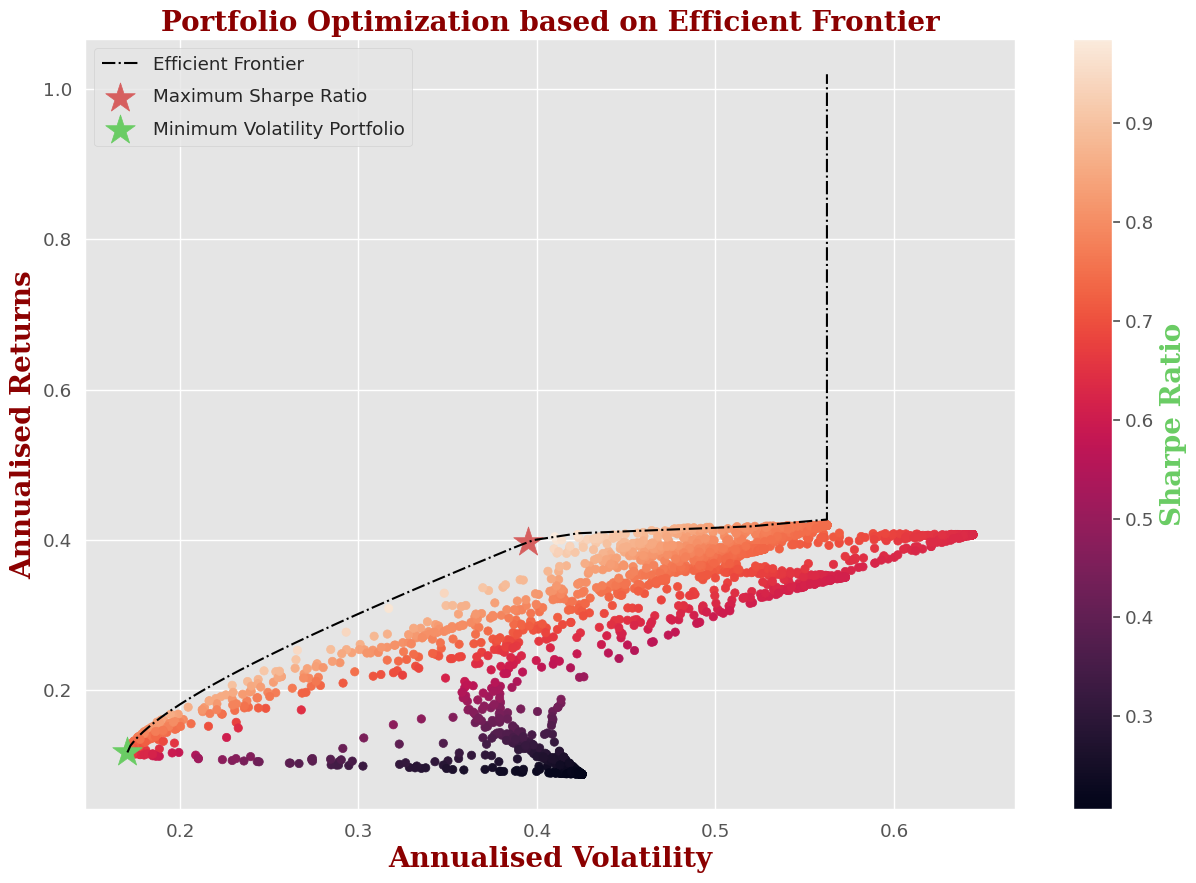

In [ ]:
sharpe_maximum = max_sharpe_ratio()
return_p,vol_p = portfolio_performance(sharpe_maximum['x'])
min_volatility = min_vol()
return_min,vol_min  = portfolio_performance(min_volatility['x'])


plt.figure(figsize =(15,10))
plt.style.use('ggplot')
plt.scatter(expected_vol,expected_returns, c = sharpe_ratio)
plt.colorbar().set_label('Sharpe Ratio', size= 20, color = 'g', family='serif',weight='bold')
target = np.linspace(return_min,1.02,100)
efficient_portfolios = efficient_frontier(target)
plt.plot([i.fun for i in efficient_portfolios], target, linestyle ='dashdot', color ='black',
         label='Efficient Frontier')
plt.scatter(vol_p,return_p, c = 'r', marker='*', s = 500, label = 'Maximum Sharpe Ratio')
plt.scatter(vol_min,return_min, c = 'g',  marker ='*', s = 500, label='Minimum Volatility Portfolio')

font1 = {'family':'serif','color':'darkred','size':20,'weight':'bold'}
font2 = {'family':'serif','color':'darkred','size':20,'weight':'bold'}
plt.title('Portfolio Optimization based on Efficient Frontier',fontdict=font1)
plt.xlabel('Annualised Volatility',fontdict=font2)
plt.ylabel('Annualised Returns',fontdict=font2)
plt.legend(labelspacing=0.8)

##Random portfolio simulation

Now we will move on to the crucial step of portfolio optimization: simulating a random portfolio using a Dirichlet distribution with weight limits. So we will try to generate 10,000 portfolios with a risk-free rate of
2.5
%
. To do this, we need to compute performance measures for each portfolio, such as the weighted average return during the year and the standard deviation and Sharpe ratio of each portfolio.

Basic formulas for calculating the necessary functions

In [ ]:
def calc_portfolio_perf(weights, mean_returns, cov, rf):
    portfolio_return = np.sum(mean_returns*weights)*252
    portfolio_std = np.sqrt(np.dot(weights.T,np.dot(cov,weights)))*np.sqrt(252)
    sharpe_ratio = (portfolio_return - rf) / portfolio_std
    return portfolio_return, portfolio_std, sharpe_ratio

def simulate_random_portfolios(num_portfolios, mean_returns, cov, rf):
    results_matrix = np.zeros((len(mean_returns)+3, num_portfolios))
    for i in range(num_portfolios):
        weights=np.random.random(len(mean_returns))
        weights /= np.sum(weights)
        portfolio_return, portfolio_std, sharpe_ratio = calc_portfolio_perf(weights, mean_returns, cov, rf)
        results_matrix[0,i] = portfolio_return
        results_matrix[1,i] = portfolio_std
        results_matrix[2,i] = sharpe_ratio
        for j in range(len(weights)):
            results_matrix[j+3,i] = weights[j]
    results_df = pd.DataFrame(results_matrix.T,columns=['ret','stdev','sharpe'] + [ticker for ticker in tickers])
    return results_df

In [ ]:
tickers = []
for i in dataset[['TSLA','AAPL','NVDA','AMD','NFLX', 'GSPC']].columns:
    tickers.append(i)

In [ ]:
mean_returns = dataset[['TSLA','AAPL','NVDA','AMD','NFLX', 'GSPC']].pct_change().mean()
cov = dataset[['TSLA','AAPL','NVDA','AMD','NFLX', 'GSPC']].pct_change().cov()
num_portfolios = 10000
rf = 0.025
results_frame =simulate_random_portfolios(num_portfolios, mean_returns,cov, rf)

In [ ]:
results_frame.sum(axis=1)-results_frame["ret"]-results_frame["stdev"]-results_frame["sharpe"];


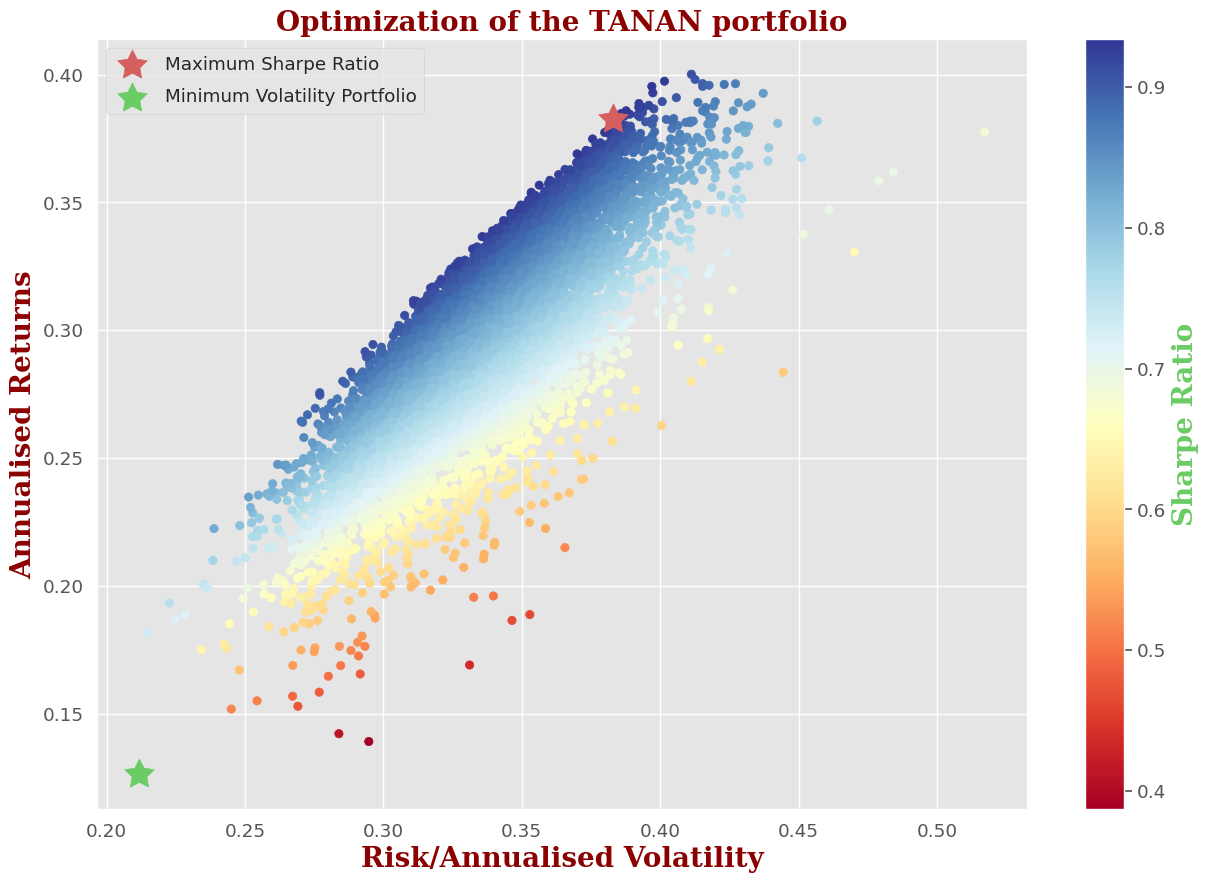

In [ ]:
max_sharpe_port=results_frame.iloc[results_frame["sharpe"].idxmax()]
min_vol_port = results_frame.iloc[results_frame["stdev"].idxmin()]
plt.subplots(figsize=(15,10))
plt.scatter(results_frame.stdev,results_frame.ret,c=results_frame.sharpe,cmap='RdYlBu')
plt.title('Optimization of the TANAN portfolio',fontdict=font1)
plt.xlabel('Risk/Annualised Volatility',fontdict=font2)
plt.ylabel('Annualised Returns',fontdict=font2)
plt.colorbar().set_label('Sharpe Ratio', size= 20, color = 'g', family='serif',weight='bold')
target = np.linspace(return_min,1.02,100)
plt.scatter(max_sharpe_port[1],max_sharpe_port[0],marker=(5,1,0),color='r',s=500, label = 'Maximum Sharpe Ratio')
plt.scatter(min_vol_port[1] ,min_vol_port[0],marker=(5,1,0),color='g', s=500, label='Minimum Volatility Portfolio')
plt.legend(labelspacing=0.8)
plt.show()

Now, let's turn to the weights of the assets in the Given Companies portfolios.

In [ ]:
top_5 = results_frame.sort_values(by='sharpe', ascending=False).head(5)
print(top_5)

           ret     stdev    sharpe      TSLA      AAPL      NVDA       AMD  \
9310  0.382567  0.382941  0.933739  0.234327  0.001973  0.249342  0.183539   
2988  0.395379  0.396974  0.933006  0.268768  0.008740  0.274597  0.067769   
270   0.384763  0.385847  0.932399  0.258639  0.013101  0.296657  0.105701   
3287  0.374842  0.375576  0.931481  0.188174  0.027656  0.266603  0.159717   
5938  0.356749  0.356297  0.931104  0.204250  0.008948  0.285133  0.044711   

          NFLX      GSPC  
9310  0.294152  0.036668  
2988  0.376906  0.003219  
270   0.291678  0.034223  
3287  0.319079  0.038770  
5938  0.311556  0.145401  


In [ ]:
max_sharpe_port.to_frame().T

,ret,stdev,sharpe,TSLA,AAPL,NVDA,AMD,NFLX,GSPC
9310,0.382567,0.382941,0.933739,0.234327,0.001973,0.249342,0.183539,0.294152,0.036668


In [ ]:
min_vol_port.to_frame().T

,ret,stdev,sharpe,TSLA,AAPL,NVDA,AMD,NFLX,GSPC
8528,0.126316,0.211763,0.478438,0.000637,0.267725,0.013605,0.030756,0.022269,0.665008


Looking at the table of weights in the portfolio with the highest Sharpe ratio (0.961699), we can see that Nvidia (NVDA) holds the highest allocation at 30.18%. Other contributors includeTesla (21.64%), Netflix (27.87%), AMD (14.4996%). Meanwhile, AAPL (0.64%), and GSPC (S&P 500) with 5.15%  have minimal allocations.

In contrast, the minimum variance portfolio, which has a Sharpe ratio of 0.517543, is heavily weighted toward GSPC (66.5%), with moderate contributions from AAPL (26.77%), while Nvidia, Tesla, Netflix, and AMD each contribute less than 3%.

We can conclude that the higher-risk portfolio (max Sharpe) provides superior risk-adjusted returns, as it offers the greatest excess return per unit of volatility. This implies that investors seeking optimal returns while tolerating higher volatility may benefit from a portfolio heavily weighted in NVDA, complemented by selective exposure to other tech stocks and the broader market.



##Conclusion
In conclusion, the analysis of stock market data for companies such as Tesla, Apple, Nvidia, Netflix, AMD, and the S&P 500 index has yielded several key insights:

Volatility

The study of annual and monthly volatilities shows that Tesla and Nvidia are among the most volatile stocks, implying higher price fluctuations and potential risk. This understanding of volatility helps investors gauge the risk profiles of individual stocks when constructing a diversified portfolio.

Correlation

The correlation analysis reveals strong positive relationships between several tech stocks and the S&P 500. For instance:

AMD and Nvidia show a particularly high correlation.

Apple and Nvidia also move closely with the broader market.
These interdependencies are valuable for designing diversified portfolios and reducing unsystematic risk.

Risk-Adjusted Returns

Through the calculation of Sharpe ratios, Nvidia stands out as the best-performing stock in terms of risk-adjusted returns. This means that, for a given level of risk, Nvidia is likely to generate a higher return than other stocks and even the broader market index (S&P 500).



In [ ]:
def calculate_bollinger_bands(price_series, window, num_std_dev):
    rolling_mean = price_series.rolling(window=window).mean()
    rolling_std = price_series.rolling(window=window).std()
    upper_band = rolling_mean + (rolling_std * num_std_dev)
    lower_band = rolling_mean - (rolling_std * num_std_dev)

    lower_band[lower_band < 0] = 0
    return rolling_mean, upper_band, lower_band

def suggest_action(current_price, upper_band, lower_band):
    if current_price > upper_band:
        return "Sell"
    elif current_price < lower_band:
        return "Buy"
    else:
        return "Hold"

try:
    holding_years = int(input("Enter your expected holding period in years: "))
except ValueError:
    print("Invalid input. Defaulting to 5 years.")
    holding_years = 5

if holding_years <= 2:
    num_std_dev = 1.0
    strategy_type = "Short-term strategy (narrow bands)"
elif holding_years <= 5:
    num_std_dev = 2.0
    strategy_type = "Medium-term strategy (standard bands)"
else:
    num_std_dev = 2.5
    strategy_type = "Long-term strategy (wider bands)"

print(f"\nStrategy Selected: {strategy_type}")
print(f"Using num_std_dev = {num_std_dev} for {holding_years} year(s) holding period.")

window = 252 * holding_years

for ticker in tickers:
    mean, upper, lower = calculate_bollinger_bands(dataset[ticker], window, num_std_dev)
    latest_price = dataset[ticker].iloc[-1]
    latest_upper = upper.iloc[-1]
    latest_lower = lower.iloc[-1]
    suggestion = suggest_action(latest_price, latest_upper, latest_lower)

    print(f"\n--- {ticker} Analysis ---")
    print(f"Latest Price       : {latest_price:.2f}")
    print(f"Bollinger Upper Band: {latest_upper:.2f}")
    print(f"Bollinger Lower Band: {latest_lower:.2f}")
    print(f"Suggested Action    : {suggestion}")




Enter your expected holding period in years: 5

Strategy Selected: Medium-term strategy (standard bands)
Using num_std_dev = 2.0 for 5 year(s) holding period.

--- TSLA Analysis ---
Latest Price       : 241.37
Bollinger Upper Band: 1232.36
Bollinger Lower Band: 0.00
Suggested Action    : Hold

--- AAPL Analysis ---
Latest Price       : 196.98
Bollinger Upper Band: 312.06
Bollinger Lower Band: 55.24
Suggested Action    : Hold

--- NVDA Analysis ---
Latest Price       : 101.49
Bollinger Upper Band: 805.37
Bollinger Lower Band: 0.00
Suggested Action    : Hold

--- AMD Analysis ---
Latest Price       : 87.50
Bollinger Upper Band: 173.82
Bollinger Lower Band: 40.21
Suggested Action    : Hold

--- NFLX Analysis ---
Latest Price       : 973.03
Bollinger Upper Band: 881.74
Bollinger Lower Band: 127.26
Suggested Action    : Sell

--- GSPC Analysis ---
Latest Price       : 526.41
Bollinger Upper Band: 596.24
Bollinger Lower Band: 285.47
Suggested Action    : Hold
